## This notebook consists of predicting the stroke using classification models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_2v.csv')
test_data = pd.read_csv('test_2v.csv')

In [3]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
train_data.shape

(43400, 12)

In [7]:
test_data.shape

(18601, 11)

In [10]:
data_combine = pd.concat([train_data, test_data], axis=0, sort=False)

In [11]:
data_combine.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0.0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0.0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0.0


In [12]:
data_combine.shape

(62001, 12)

In [13]:
combined = data_combine.copy()

In [14]:
combined.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   2053
smoking_status       19043
stroke               18601
dtype: int64

In [ ]:
#visualising the outcome with features

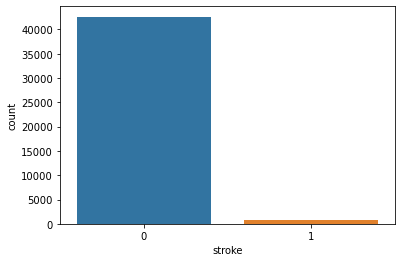

In [15]:
sns.countplot(x = 'stroke', data = train_data)

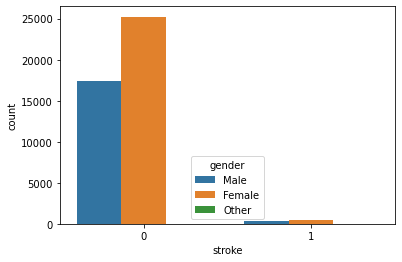

In [16]:
sns.countplot(x = 'stroke', data = train_data, hue = 'gender')

In [17]:
combined['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
train_data['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

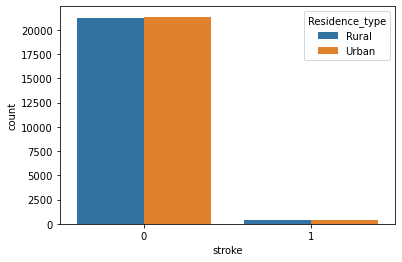

In [20]:
sns.countplot(x = 'stroke', data = train_data, hue = 'Residence_type')         #almost equal

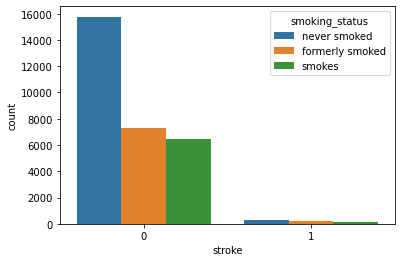

In [21]:
sns.countplot(x = 'stroke', data = train_data, hue = 'smoking_status') 

In [22]:
train_data.groupby('stroke').median()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36356,43.0,0,0,91.47,27.7
1,36236,71.0,0,0,104.47,29.1


In [26]:
print(train_data.nlargest(1, columns='bmi'))
print(train_data.nsmallest(1, columns = 'bmi'))


         id gender   age  hypertension  heart_disease ever_married work_type  \
1913  56420   Male  17.0             1              0           No   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
1913          Rural              61.67  97.6            NaN       0  
          id gender   age  hypertension  heart_disease ever_married work_type  \
26619  23130   Male  39.0             0              0          Yes   Private   

      Residence_type  avg_glucose_level   bmi smoking_status  stroke  
26619          Rural               75.9  10.1         smokes       0  


In [ ]:
#bmi median value is close for stroke, thats is we will replace NaN bmi values with median values

In [27]:
train_data.bmi.median()

27.7

In [29]:
median = train_data.bmi.median()
train_data.bmi.fillna(median, inplace=True)

In [30]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [32]:
train_data.smoking_status.fillna('Missing', inplace=True)

In [33]:
train_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
train_data.drop(columns='id', inplace=True)

In [38]:
gender_dict ={'Male': 1,'Female' : 0, 'Other': 2}
train_data['gender'] = train_data.gender.map(gender_dict)

In [39]:
train_data.ever_married.value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [41]:
married_dict = {'Yes':1, 'No': 0}
train_data['ever_married'] = train_data.ever_married.map(married_dict)

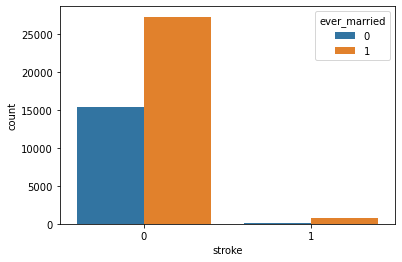

In [42]:
sns.countplot(x = 'stroke', data = train_data, hue = 'ever_married')

In [43]:
train_data.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

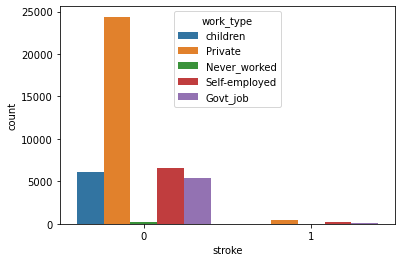

In [44]:
sns.countplot(x = 'stroke', data = train_data, hue = 'work_type')

In [ ]:
#private and self employeed had some effect on stroke

In [45]:
train_data.Residence_type.value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

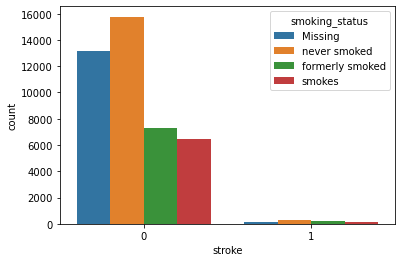

In [46]:
sns.countplot(x = 'stroke', data= train_data, hue = 'smoking_status')

In [47]:
train_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,children,Rural,95.12,18.0,Missing,0
1,1,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0
2,0,8.0,0,0,0,Private,Urban,110.89,17.6,Missing,0
3,0,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,0,Never_worked,Rural,161.28,19.1,Missing,0


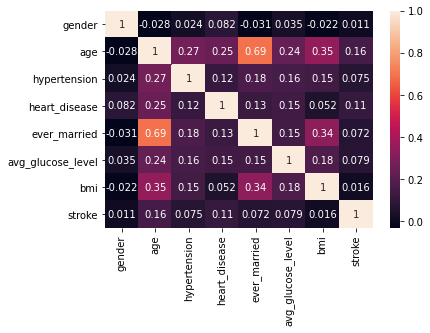

In [48]:
sns.heatmap(train_data.corr(), annot=True, )

In [49]:
train_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#age and heart_disease has the max correlation with stroke. 

In [51]:
train_df = train_data.copy()

In [52]:
#let us apply get_dummeies on categorical
train_df = pd.get_dummies(train_data,columns=['work_type', 'Residence_type', 'smoking_status'])

In [57]:
train_df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Missing,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,3.0,0,0,0,95.12,18.0,0,0,0,0,0,1,1,0,1,0,0,0
1,1,58.0,1,0,1,87.96,39.2,0,0,0,1,0,0,0,1,0,0,1,0
2,0,8.0,0,0,0,110.89,17.6,0,0,0,1,0,0,0,1,1,0,0,0
3,0,70.0,0,0,1,69.04,35.9,0,0,0,1,0,0,1,0,0,1,0,0
4,1,14.0,0,0,0,161.28,19.1,0,0,1,0,0,0,1,0,1,0,0,0


In [58]:
X = train_df.drop(columns='stroke')
y= train_df['stroke']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [65]:
#Feature scaling after splitting the data into train and test to avoid data leakage. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc  =StandardScaler()
mn = MinMaxScaler()

In [68]:
X_train2 = X_train.copy()

In [ ]:
#trying with minmax first

In [70]:
X_train2[['avg_glucose_level','bmi','age']] = mn.fit_transform(X_train2[['avg_glucose_level','bmi','age']])

In [72]:
X_train2.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Missing,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
23984,1,0.060059,0,0,0,0.056225,0.108571,0,0,0,0,1,0,1,1,0,0,0
33652,0,1.000000,0,0,1,0.231740,0.126857,0,0,1,0,0,0,1,0,0,1,0
11770,0,0.353027,0,0,1,0.072907,0.098286,0,0,1,0,0,1,0,1,0,0,0
19010,1,0.328613,0,0,0,0.243568,0.165714,0,0,1,0,0,1,0,0,0,0,1
23192,0,0.694824,0,0,1,0.066375,0.371429,0,0,1,0,0,0,1,0,1,0,0


In [73]:
X_test2 = X_test.copy()

In [74]:
X_test2[['avg_glucose_level','bmi','age']] = mn.fit_transform(X_test2[['avg_glucose_level','bmi','age']])

## Implementing Machine Learning Models

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

**KNN:**

In [76]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train2, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.9818125960061442


In [89]:
def plot_roc_curve(fpr, tpr, algoname):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + algoname)
    plt.legend()
    plt.show()

AUC: 0.65


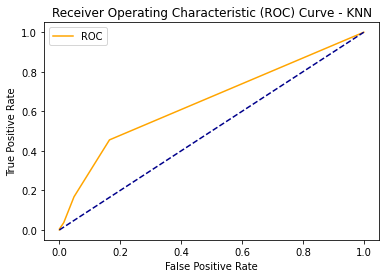

In [90]:
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'KNN')

**RandomForest:**

In [77]:
rfc = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
score = cross_val_score(rfc,X_train2,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.981321044546851


In [78]:
rfc = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
score = cross_val_score(rfc,X_train,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.9814132104454686


AUC: 0.67


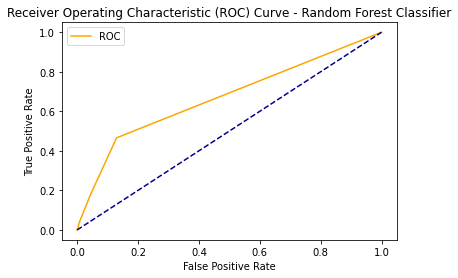

In [86]:
rfc.fit(X_train, y_train)
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Random Forest Classifier')

**LogisticRegression:**

In [92]:
log_mod = LogisticRegression(max_iter=100000)
scoring = 'accuracy'
score = cross_val_score(log_mod,X_train,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.9818125960061442


AUC: 0.83


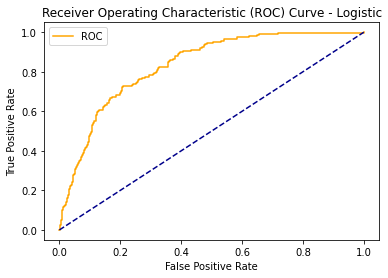

In [93]:
log_mod.fit(X_train, y_train)
probs = log_mod.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'Logistic')

**Xgboost:**

In [97]:
xgb = XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(xgb,X_train2,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.9818125960061442


AUC: 0.84


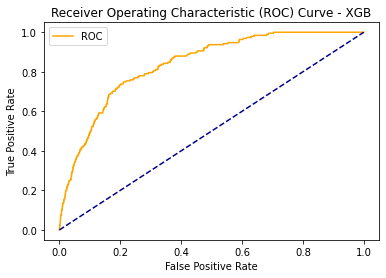

In [96]:
xgb.fit(X_train, y_train)
probs = xgb.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'XGB')

**DecisionTree:**

In [99]:
dtc = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(dtc,X_train2,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.9616282642089093


AUC: 0.54


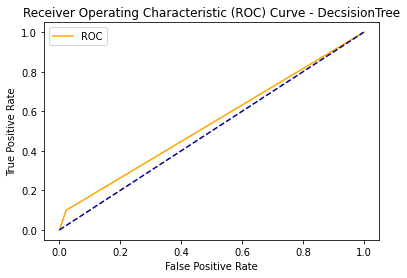

In [100]:
dtc.fit(X_train, y_train)
probs = dtc.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr, 'DecsisionTree')

In [ ]:
#We will be using Xgboost as AUC Score is the best of 0.84